<a href="https://colab.research.google.com/github/rinivarg/ReproRehab2024-Pod3/blob/main/Materials/Week%206/Week%206%20-%20Codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Week 6**: Codebooks & Cloud Computing
This codebook is a Jupyter Notebook and you are using Google's cloud services to run R code in it. You can similarly run Python code if you went into the 'Runtime' option above and select 'Change Runtime.'


## Clear the Workspace & Load Libraries

In [2]:
install.packages("lemon")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘gridExtra’




In [3]:
rm(list = ls())

ReqdLibs = c("ggplot2","dplyr","lemon")
invisible(lapply(ReqdLibs, library, character.only = TRUE))


## Let's load a built-in R dataset


In [4]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


## Set theme for a figure

In [5]:
thm = theme(
          plot.title = element_text(colour = "black",size = 35, face = "bold", hjust = 0.5),
          legend.text = element_text(size = 18),
          legend.title = element_text(size = 20),
          axis.ticks.length = unit(0.3,"cm"),
          axis.line = element_line(colour = "black",linewidth = 1),
          axis.ticks = element_line(colour = "black",linewidth = 1),
          axis.text = element_text(colour = "black",size = 35),
          axis.text.x = element_text(lineheight = 1.1, margin = margin(t = 20)),
          axis.title.x = element_text(size=35, colour = "grey35", face = "plain",
                                     lineheight = 1.1, margin = margin(r = 10)),
          axis.title.y = element_text(size=35, colour = "grey35", face = "plain",
                                     lineheight = 1.1, margin = margin(r = 10)))



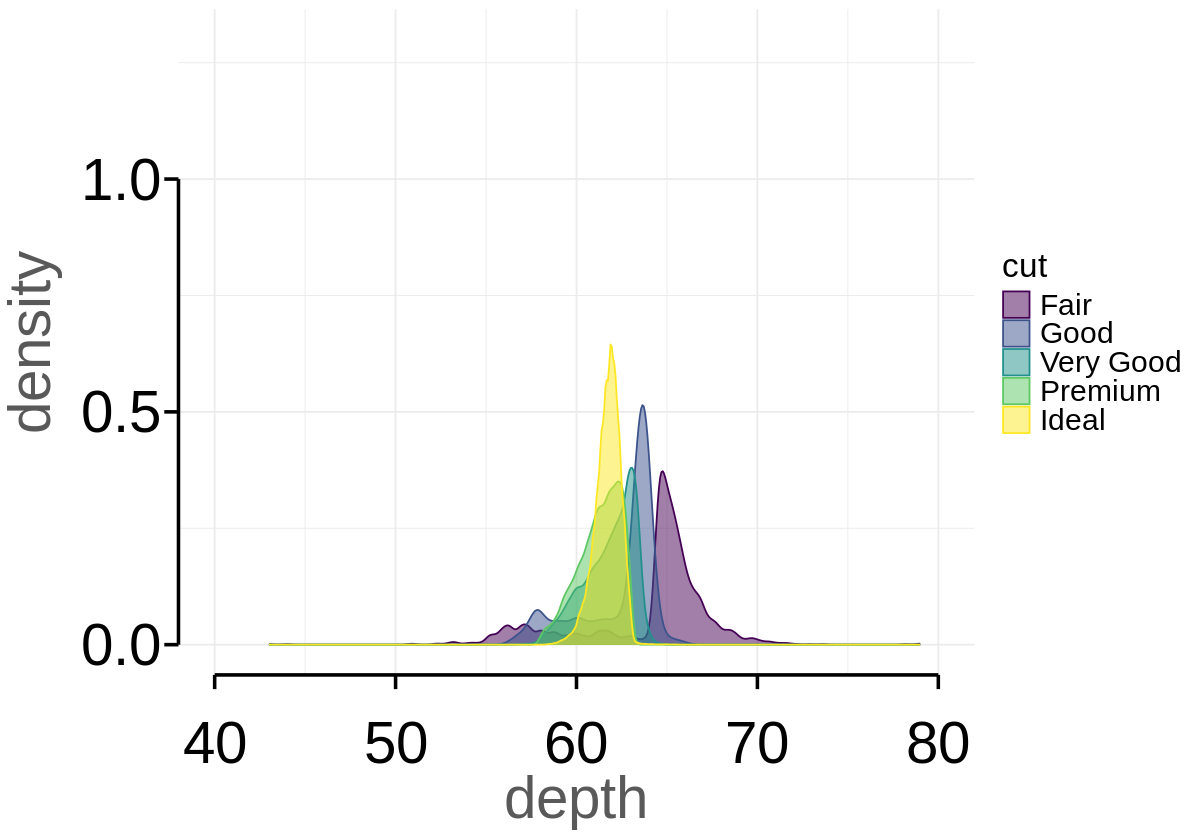

In [7]:
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(diamonds, mapping = aes(x = depth, y = after_stat(density), group = cut, col = cut, fill = cut)) +
  # geom_histogram(bins = 50, fill = NA) +
  geom_density(alpha = 0.5) +
  coord_capped_cart(xlim = c(40,80), ylim = c(0, 1.3), left = "both", bottom = "both") +
    theme_minimal() + thm


## Use DPLYR functions

In [9]:
diamonds %>%
  filter(cut=="Ideal") %>%
  select(clarity,x,y,z, price) %>%
  {.->>diamonds.ideal}

head(diamonds.ideal)

clarity,x,y,z,price
<ord>,<dbl>,<dbl>,<dbl>,<int>
SI2,3.95,3.98,2.43,326
VS1,3.93,3.90,2.46,340
SI2,4.35,4.37,2.71,344
SI2,4.31,4.34,2.68,348
SI2,4.49,4.51,2.78,403
SI2,4.49,4.50,2.75,403


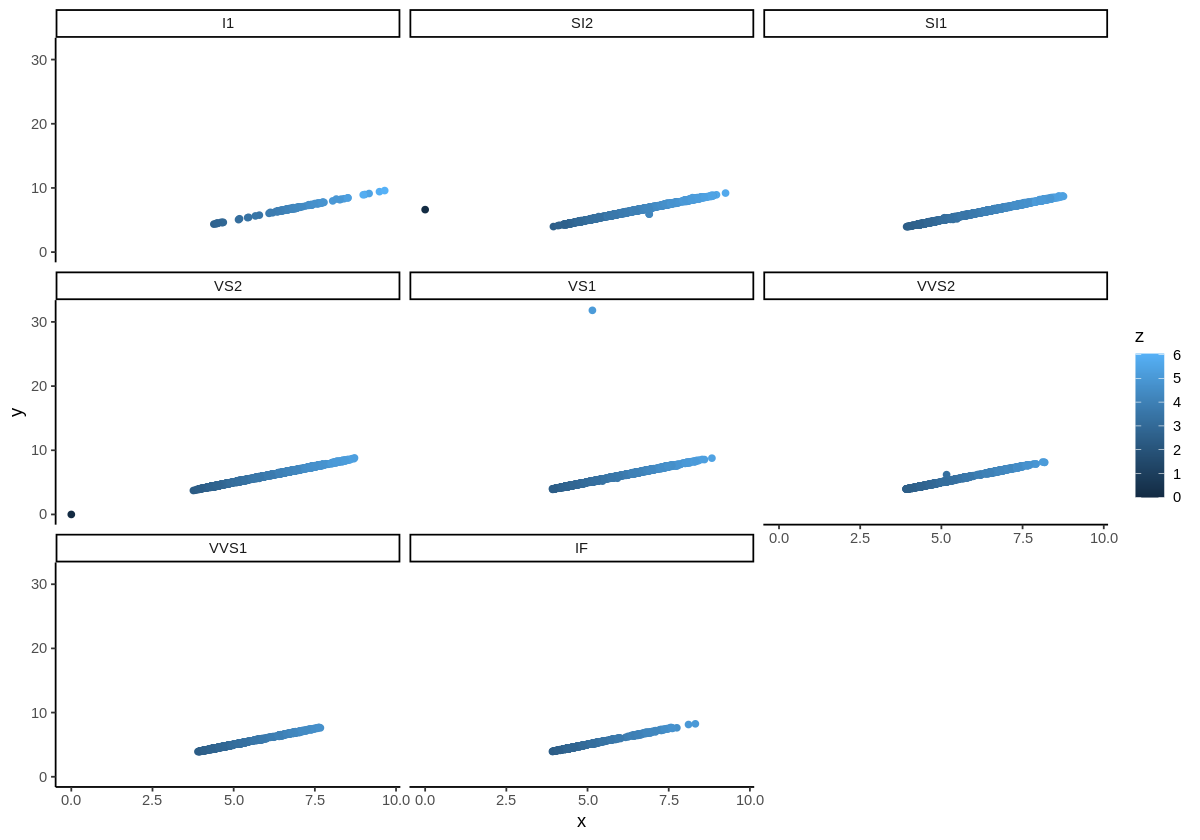

In [10]:
ggplot(diamonds.ideal, aes(x = x, y = y, col = z)) +
  geom_point() + facet_wrap(~clarity) + theme_classic()

# The End
---